Import libraries

In [2]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/mushroom_cleaned.csv")
df


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))
scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,2.236139,-0.925864,-0.063737,0.834467,4.682845,0.631570,0.791508,2.788402
1,2.483444,-0.925864,-0.063737,0.834467,4.682845,0.646914,0.791508,2.788402
2,2.233361,-0.925864,-0.063737,0.834467,4.383334,0.658423,0.791508,2.788402
3,1.927704,0.925572,-0.063737,0.834467,4.652283,0.658423,0.791508,2.788402
4,2.049966,0.925572,-0.063737,0.834467,4.536146,0.527996,0.791508,-0.029348


In [18]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],
test_size=0.30)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')
pred = knn.predict(X_test)
print(pred)

[1 0 1 ... 0 1 0]


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[7200  109]
 [  83 8819]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7309
           1       0.99      0.99      0.99      8902

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



Text(0, 0.5, 'Error Rate')

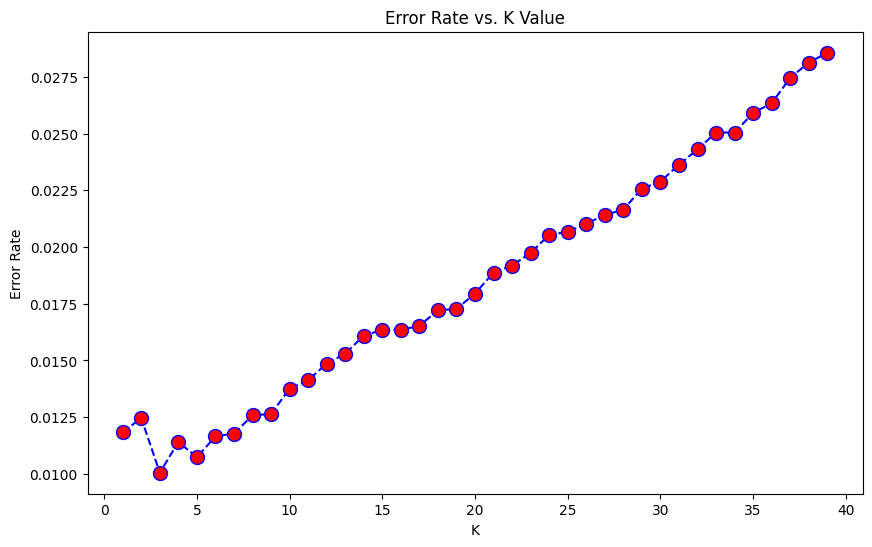

In [22]:
#Choosing a K Value
#Use the elbow method to pick a good K Value:
error_rate = []
# Will take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

 **1-** The graph shows the relationship between the number of neighbors (k) and the error rate of the KNN classifier.\
 **2-** As the number of neighbors increases, the error rate initially decreases, reaches a minimum, and then starts to increase again. \
 **3-** The optimal number of neighbors is the one that minimizes the error rate.\
 **4-** In this case, the optimal number of neighbors is around k<=5.


In [23]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[7200  109]
 [  83 8819]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7309
           1       0.99      0.99      0.99      8902

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



In [26]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[7215   94]
 [  69 8833]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7309
           1       0.99      0.99      0.99      8902

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



In [27]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[7208  101]
 [  73 8829]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7309
           1       0.99      0.99      0.99      8902

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



# Summary

The provided code demonstrates the application of the K-Nearest Neighbors (KNN) algorithm for classifying mushroom types based on various features extracted from a dataset. Here's a summary of the steps involved:

1. **Data Import and Preprocessing**:
    - The code imports the necessary libraries for data analysis and modeling.
    - It reads the mushroom dataset from a CSV file (`/content/mushroom_cleaned.csv`) into a Pandas dataframe (`df`).
    - The data is then standardized using the `StandardScaler` to ensure features have a mean of 0 and a standard deviation of 1.

2. **Train-Test Split**:
    - The code splits the scaled features and class labels into training and testing sets using `train_test_split`. This allows for evaluating the model's performance on unseen data.

3. **Model Training**:
    - A KNN classifier is instantiated with `n_neighbors=1`.
    - The model is trained on the training data (`X_train` and `y_train`).

4. **Predictions and Evaluation**:
    - The trained model is used to predict the class labels for the test data (`X_test`).
    - The predictions (`pred`) are compared to the actual labels (`y_test`) using various metrics:
        - Confusion matrix: This visualizes the correct and incorrect classifications.
        - Classification report: This provides detailed metrics like precision, recall, and f1-score for each class.

5. **Choosing the Optimal K Value**:
    - The code explores different values of `k` (number of neighbors) to find the optimal value that minimizes the error rate.
    - A plot of error rate vs. `k` is generated using `matplotlib`.
    - Based on the plot, the optimal `k` value is chosen.

6. **Comparison of Different K Values**:
    - The code trains and evaluates the KNN model with different values of `k` (1, 3, and 5) and compares their performance using confusion matrices and classification reports.
    - Found that k=3 resulted in the best performance.


7. **Summary**:
    - The code demonstrates the process of applying the KNN algorithm for mushroom classification, including data preprocessing, model training, evaluation, and choosing the optimal `k` value.
    - By analyzing the results, one can select the best `k` value and assess the model's performance for predicting mushroom types.

